# Contents
- [Data](#data)
- [Encode Categorical Data](#enc)
    - [One-hot Encoding](#oh_enc)
    - [Ordinal Encoding](#ord_enc)
- [Log Transformation](#log)
    - [Feature](#log_feat)
    - [Target](#log_tar)
- [Scaling](#scl)
    - [Standardize](#scl_std)
    - [Normalize](#scl_nrm)
- [Polynomial Transformation](#poly)
- [Pipeline](#pipe)

# Imports

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data <a name="data"></a>

In [2]:
filename = 'data/diamonds.csv'

In [3]:
n = sum(1 for line in open(filename)) - 1
s = 2000
random.seed(5)
skip = sorted(random.sample(range(1, n+1), n-s))
df = pd.read_csv(filename, skiprows=skip, index_col=0)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
49,0.25,Very Good,E,VS2,63.3,60.0,404,4.00,4.03,2.54
66,0.28,Ideal,G,VVS2,61.4,56.0,553,4.19,4.22,2.58
79,0.26,Very Good,D,VVS2,62.8,60.0,554,4.01,4.05,2.53
120,0.80,Ideal,F,SI2,59.9,59.0,2762,6.01,6.07,3.62
188,0.71,Premium,F,VS2,62.1,58.0,2777,5.67,5.70,3.53


In [5]:
X_num = df.iloc[:, [0, 4, 5, 6, 7, 8]].copy()

In [6]:
y = X_num.pop('price')
y.head()

49      404
66      553
79      554
120    2762
188    2777
Name: price, dtype: int64

In [7]:
X_num.head()

,carat,depth,table,x,y
49,0.25,63.3,60.0,4.00,4.03
66,0.28,61.4,56.0,4.19,4.22
79,0.26,62.8,60.0,4.01,4.05
120,0.80,59.9,59.0,6.01,6.07
188,0.71,62.1,58.0,5.67,5.70


In [8]:
X_cat = df.iloc[:, [1, 2, 3]].copy()
X_cat.head()

,cut,color,clarity
49,Very Good,E,VS2
66,Ideal,G,VVS2
79,Very Good,D,VVS2
120,Ideal,F,SI2
188,Premium,F,VS2


## Column Definitions

carat (num): weight in carats (1 carat = 200 mg) (0.2--5.01)

cut (cat): quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color (cat): diamond color (J (worst) -- D (best))

clarity (cat): how obvious inclusions are within the diamond (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

depth (num): height of diamond, measured from the culet (bottom tip) to the table (top), divided by its average girdle (widest dimension) diameter = z / mean(x, y) (43--79)

table (num): width of diamond's table (top) expressed as a percentage of its average diameter

price (num): price in US dollars (326--18,823)

x (num): length in mm (0--10.74)

y (num): width in mm (0--58.9)

z (num): depth in mm (0--31.8)

## EDA

### Data Distributions

In [9]:
# sns.pairplot(df);

## Variable Distributions

### Carat Distribution

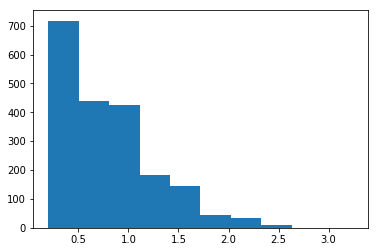

In [10]:
plt.hist(df['carat']);

### Price Distribution

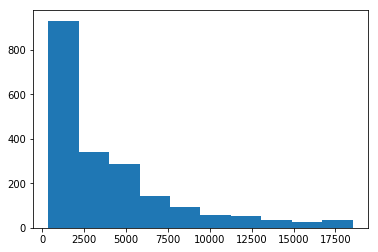

In [11]:
plt.hist(df['price']);

## Feature-Target Plots

### Carat vs Price

Text(0,0.5,'Price ($)')

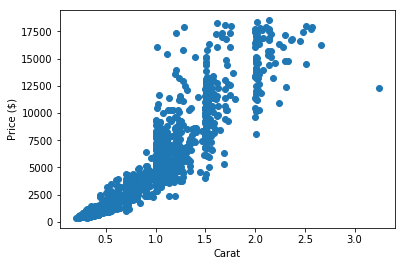

In [12]:
plt.scatter(df['carat'], df['price'])
plt.xlabel('Carat')
plt.ylabel('Price ($)')

# Encode Categorical Data <a name="enc"></a>

## One-Hot Encoding <a name="oh_enc"></a>
Encode categorical features as sparse matrix of categorical labels.

In [13]:
X_cat_oh = pd.get_dummies(X_cat)
X_cat_oh.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
49,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
66,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
79,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
120,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
188,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Oridnal Encoding <a name="ord_enc"></a>
Encode categorical features as ordinal rank for each category.

In [14]:
X_cat_ord = X_cat.copy()

In [15]:
cut_ord = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_ord = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_ord = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ord_list = [cut_ord, color_ord, clarity_ord]

In [16]:
# replace string feature labels with ordinal values
for i, column in enumerate(X_cat_ord.columns):
    
    # create label dictionary for each categorical feature
    label_dict = {}
    for j, label in enumerate(ord_list[i]):
        # map each label to ordinal value
        label_dict[label] = j
    
    # replace feature labels with ordinal values
    X_cat_ord[column] = X_cat_ord[column].map(label_dict)

In [17]:
X_cat.head()

,cut,color,clarity
49,Very Good,E,VS2
66,Ideal,G,VVS2
79,Very Good,D,VVS2
120,Ideal,F,SI2
188,Premium,F,VS2


In [18]:
X_cat_ord.head()

,cut,color,clarity
49,2,5,3
66,4,3,5
79,2,6,5
120,4,4,1
188,3,4,3


## Combine Numerical and Categorical Features

In [19]:
# one-hot encoded
X = pd.concat([X_num, X_cat_oh], axis=1)
X.head()

,carat,depth,table,x,y,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
49,0.25,63.3,60.0,4.00,4.03,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
66,0.28,61.4,56.0,4.19,4.22,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
79,0.26,62.8,60.0,4.01,4.05,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
120,0.80,59.9,59.0,6.01,6.07,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
188,0.71,62.1,58.0,5.67,5.70,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Log Transformation <a name="log"></a>

## Feature Variable <a name="log_feat"></a>
Transform feature with apparent log-normal distribution to log scale.

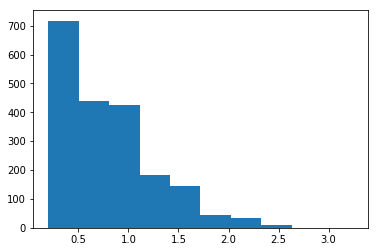

In [20]:
# feature disrtibution
plt.hist(X['carat']);

In [21]:
# transform feature to log-scale
X_ln = X.copy()
X_ln['carat'] = X_ln['carat'].apply(np.log)

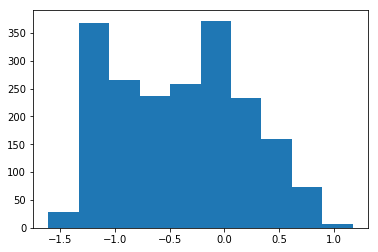

In [22]:
# transformed feature distribution
plt.hist(X_ln['carat']);

## Target Variable <a name="log_tar"></a>
Transform target variable with apparent log-normal distribution to log scale.

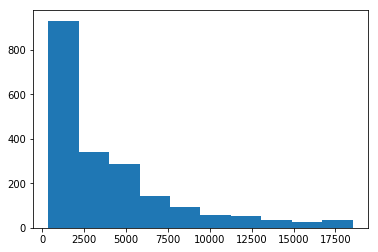

In [23]:
# target distribution
plt.hist(y);

In [24]:
# transform target to log-scale
y_ln = np.log(y)

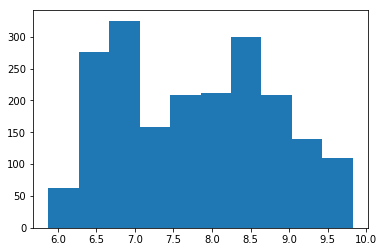

In [25]:
# transformed distribution
plt.hist(y_ln);

# Scaling <a name="scl"></a>

## Standardize <a name="scl_std"></a>
For each feature, subtract mean and then divide by standard deviation  
Scaled data has mean = 0 and variance = 1

In [26]:
X_std = pd.DataFrame()

for feature in X.columns:
    X_mean = np.mean(X[feature])
    X_sigma = np.std(X[feature])
    X_std[feature] = (X[feature] - X_mean) / X_sigma

In [27]:
X_std.head()

,carat,depth,table,x,y,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
49,-1.156521,1.019265,1.142617,-1.536322,-1.519391,-0.181818,-0.325875,-0.825029,-0.574271,1.888441,...,-0.341606,-0.226991,-0.125475,-0.205449,-0.559641,-0.456573,-0.426653,1.877468,-0.254878,-0.327749
66,-1.093267,-0.269828,-0.626619,-1.367634,-1.349779,-0.181818,-0.325875,1.212079,-0.574271,-0.529537,...,-0.341606,-0.226991,-0.125475,-0.205449,-0.559641,-0.456573,-0.426653,-0.532632,-0.254878,3.051111
79,-1.135436,0.680030,1.142617,-1.527443,-1.501537,-0.181818,-0.325875,-0.825029,-0.574271,1.888441,...,-0.341606,-0.226991,-0.125475,-0.205449,-0.559641,-0.456573,-0.426653,-0.532632,-0.254878,3.051111
120,0.003152,-1.287532,0.700308,0.248215,0.301704,-0.181818,-0.325875,1.212079,-0.574271,-0.529537,...,-0.341606,-0.226991,-0.125475,-0.205449,-0.559641,2.190229,-0.426653,-0.532632,-0.254878,-0.327749
188,-0.186613,0.205101,0.257999,-0.053647,-0.028593,-0.181818,-0.325875,-0.825029,1.741338,-0.529537,...,-0.341606,-0.226991,-0.125475,-0.205449,-0.559641,-0.456573,-0.426653,1.877468,-0.254878,-0.327749


### StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# create instance of scaler
std_scaler = StandardScaler()

In [30]:
# fit scaler to feature data
std_scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
# apply scaler to feature data
std_scaler.transform(X)[0:5]

array([[-1.15652147,  1.01926544,  1.14261682, -1.53632176, -1.51939067,
        -0.18181818, -0.32587527, -0.82502865, -0.57427105,  1.88844117,
        -0.37969035,  2.20180681, -0.45657334, -0.52178983, -0.4412971 ,
        -0.34160589, -0.22699055, -0.12547523, -0.20544947, -0.55964063,
        -0.45657334, -0.42665337,  1.87746821, -0.25487787, -0.32774947],
       [-1.09326654, -0.26982751, -0.62661915, -1.36763422, -1.34977895,
        -0.18181818, -0.32587527,  1.21207912, -0.57427105, -0.52953728,
        -0.37969035, -0.45417245, -0.45657334,  1.91648042, -0.4412971 ,
        -0.34160589, -0.22699055, -0.12547523, -0.20544947, -0.55964063,
        -0.45657334, -0.42665337, -0.53263219, -0.25487787,  3.051111  ],
       [-1.13543649,  0.68003045,  1.14261682, -1.52744347, -1.50153681,
        -0.18181818, -0.32587527, -0.82502865, -0.57427105,  1.88844117,
         2.63372511, -0.45417245, -0.45657334, -0.52178983, -0.4412971 ,
        -0.34160589, -0.22699055, -0.12547523, -0

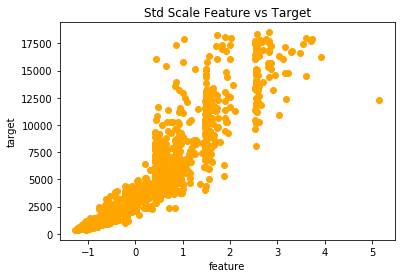

In [32]:
plt.scatter([feature[0] for feature in std_scaler.transform(X)], y.values, c='orange')
plt.title('Std Scale Feature vs Target')
plt.xlabel('feature')
plt.ylabel('target');

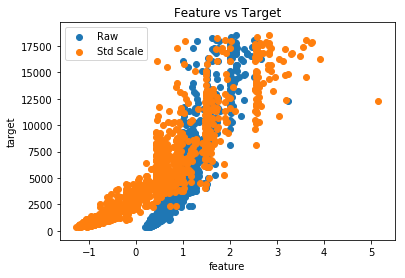

In [33]:
plt.scatter(X.iloc[:, 0], y, label='Raw')
plt.scatter([feature[0] for feature in std_scaler.transform(X)], y, label='Std Scale')
plt.title('Feature vs Target')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend();

## Normalize <a name="scl_nrm"></a>
For each feature, subtract minimum and then divide by difference between maximum and minimum  
Scaled values are between 0 and 1

In [34]:
X_norm = pd.DataFrame()

for feature in X.columns:
    X_min = min(X[feature])
    X_max = max(X[feature])
    X_norm[feature] = (X[feature] - X_min) / (X_max - X_min)

In [35]:
X_norm.head()

,carat,depth,table,x,y,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
49,0.016447,0.695205,0.578947,0.040564,0.054577,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
66,0.026316,0.630137,0.368421,0.074074,0.088028,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
79,0.019737,0.678082,0.578947,0.042328,0.058099,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
120,0.197368,0.578767,0.526316,0.395062,0.413732,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
188,0.167763,0.654110,0.473684,0.335097,0.348592,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
# create instance of scaler
norm_scaler = MinMaxScaler()

In [38]:
# fit scaler to training feature data
norm_scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [39]:
# apply scaler to training feature data
norm_scaler.transform(X)[0:5]

array([[0.01644737, 0.69520548, 0.57894737, 0.04056437, 0.05457746,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.02631579, 0.63013699, 0.36842105, 0.07407407, 0.08802817,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.01973684, 0.67808219, 0.57894737, 0.04232804, 0.05809859,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

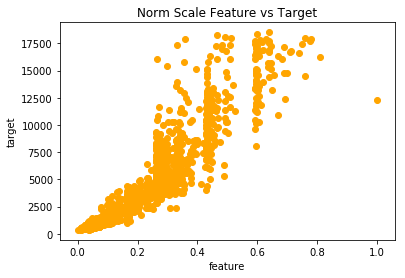

In [40]:
plt.scatter([feature[0] for feature in norm_scaler.transform(X)], y, c='orange')
plt.title('Norm Scale Feature vs Target')
plt.xlabel('feature')
plt.ylabel('target');

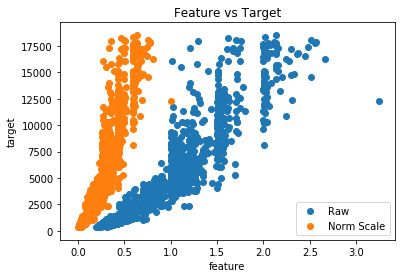

In [41]:
plt.scatter(X.iloc[:, 0], y, label='Raw')
plt.scatter([feature[0] for feature in norm_scaler.transform(X)], y, label='Norm Scale')
plt.title('Feature vs Target')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend();

# Polynomial Transformation <a name="poly"></a>
Create polynomial interaction of features for model

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
# create instance of polynomial features, specify degree
poly = PolynomialFeatures(degree=2)

In [44]:
# fit scaler to feature data
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [45]:
# apply to feature data, creates new features
poly.transform(X)[0:5]

array([[ 1.  ,  0.25, 63.3 , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.28, 61.4 , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  ,  0.26, 62.8 , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  ,  0.8 , 59.9 , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.71, 62.1 , ...,  0.  ,  0.  ,  0.  ]])

In [46]:
# output features
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x0 x18',
 'x0 x19',
 'x0 x20',
 'x0 x21',
 'x0 x22',
 'x0 x23',
 'x0 x24',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x1 x15',
 'x1 x16',
 'x1 x17',
 'x1 x18',
 'x1 x19',
 'x1 x20',
 'x1 x21',
 'x1 x22',
 'x1 x23',
 'x1 x24',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x2 x15',
 'x2 x16',
 'x2 x17',
 'x2 x18',
 'x2 x19',
 'x2 x20',
 'x2 x21',
 'x2 x22',
 'x2 x23',
 'x2 x24',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x

In [47]:
# output features mapped to dataframe columns
poly.get_feature_names(input_features=X.columns)

['1',
 'carat',
 'depth',
 'table',
 'x',
 'y',
 'cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'carat^2',
 'carat depth',
 'carat table',
 'carat x',
 'carat y',
 'carat cut_Fair',
 'carat cut_Good',
 'carat cut_Ideal',
 'carat cut_Premium',
 'carat cut_Very Good',
 'carat color_D',
 'carat color_E',
 'carat color_F',
 'carat color_G',
 'carat color_H',
 'carat color_I',
 'carat color_J',
 'carat clarity_I1',
 'carat clarity_IF',
 'carat clarity_SI1',
 'carat clarity_SI2',
 'carat clarity_VS1',
 'carat clarity_VS2',
 'carat clarity_VVS1',
 'carat clarity_VVS2',
 'depth^2',
 'depth table',
 'depth x',
 'depth y',
 'depth cut_Fair',
 'depth cut_Good',
 'depth cut_Ideal',
 'depth cut_Premium',
 'depth cut_Very Good',
 'depth color_D',
 'depth color_E',


In [48]:
# polynomial features dataframe
df_poly = pd.DataFrame(poly.transform(X), columns=poly.get_feature_names(input_features=X.columns))
df_poly.head()

,1,carat,depth,table,x,y,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,clarity_VS1^2,clarity_VS1 clarity_VS2,clarity_VS1 clarity_VVS1,clarity_VS1 clarity_VVS2,clarity_VS2^2,clarity_VS2 clarity_VVS1,clarity_VS2 clarity_VVS2,clarity_VVS1^2,clarity_VVS1 clarity_VVS2,clarity_VVS2^2
0,1.0,0.25,63.3,60.0,4.00,4.03,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.28,61.4,56.0,4.19,4.22,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.26,62.8,60.0,4.01,4.05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.80,59.9,59.0,6.01,6.07,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.71,62.1,58.0,5.67,5.70,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Pipeline <a name="pipe"></a>
Combine preprocessing steps within pipeline.

In [49]:
from sklearn.pipeline import Pipeline

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
# set pipeline parameters
lr_pipe = Pipeline([
    ('scaler', StandardScaler()), # apply standardizer to data
    ('poly', PolynomialFeatures(2)), # calculate polynomial features
    ('model', LinearRegression()) # linear regression modeling
])

In [52]:
# fit on log transformed feature and target data
lr_pipe.fit(X_ln, y_ln)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])